<img src="img/usmlogo.png" style="float:right;height:100px">
<img src="img/dilogo.png" style="float:left;height:60px">
<center>
<div>
    <center>
    <h1>Laboratorio 3 Estadística Computacional</h1>
    </center>
</div>
<div>
    <center>
    <br>
    <h5> Giorgio Pellizzari - 201473599-5 - Malla Nueva</h5>
    <h5> Felipe Vega - 201473511-1 - Malla Nueva</h5>
    <h6>9 de abril del 2018</h6>
    </center>
</div>
</center>

In [10]:
from scipy.stats import poisson
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci
from scipy import stats, special
import statsmodels.api as sm
import math
#import warnings
#warnings.filterwarnings('ignore')

# Ley de los Grandes Números

 Se realiza un realizado en una tienda de un centro comercial indica que la cantidad de clientes que frecuentan dicha tienda por día se puede modelar como una distribución de Poisson con parámetro $\lambda = 100$. Con dicho estudio como base se estudia la _Ley de los Grandes Números_, la cual indica que a medida que se aumenta el tamaño de una muestra, el promedio de los datos converge al promedio de la población completa.
 
 Primero se calcula la probabilidad teórica de que 80, 100 y 120 clientes frecuenten la tienda, para esto se utiliza el método _"poisson.pmf"_ de la librería _"Scipy"_.

In [11]:
mu=100
x = poisson.pmf(80, mu)
y = poisson.pmf(100, mu)
z = poisson.pmf(120, mu)
print(x,y,z)

0.00519785412598 0.0398609968091 0.00556106488651


Se obtienen de esta forma las siguiete probabilidades:
    1. La probabilidad de que K=80 es: 0.005197854125980293 
    2. La probabilidad de que K=100 es: 0.03986099680914883
    3. La probabilidad de que K=120 es: 0.005561064886513308
    
Luego, se generan cuatro muestras de tamaños 5, 100, 5000 y 10000 con las cuales se calculan las probabilidades empíricas de que 80, 100 y 120 clientes frecuenten la tienda.

In [12]:
np.random.seed(10)

muestra5 = np.random.poisson(mu, size=5)
muestra100 = np.random.poisson(mu, size=100)
muestra5000 = np.random.poisson(mu, size=5000)
muestra10000= np.random.poisson(mu, size=10000)

def probs(a):
    x=0
    y=0
    z=0
    for i in a:
        if i==80:
            x=x+1
        elif i==100:
            y=y+1
        elif i==120:
            z=z+1
    return [x/len(a),y/len(a),z/len(a)]

print (probs(muestra5))
print (probs(muestra100))
print (probs(muestra5000))
print (probs(muestra10000))

[0.0, 0.2, 0.0]
[0.0, 0.02, 0.0]
[0.005, 0.0416, 0.0056]
[0.0042, 0.0402, 0.0068]


Se obtuvieron los siguientes resultados.

Para la muestra de n=5:
    1. La probabilidad de que K=80 es: 0.0
    2. La probabilidad de que K=100 es: 0.2
    3. La probabilidad de que K=120 es: 0.0
    
Para la muestra de n=100:
    1. La probabilidad de que K=80 es: 0.0
    2. La probabilidad de que K=100 es: 0.02
    3. La probabilidad de que K=120 es: 0.0
    
Para la muestra de n=5000:
    1. La probabilidad de que K=80 es: 0.005
    2. La probabilidad de que K=100 es: 0.0416
    3. La probabilidad de que K=120 es: 0.0056

Para la muestra de n=10000:
    1. La probabilidad de que K=80 es: 0.0042
    2. La probabilidad de que K=100 es: 0.0402
    3. La probabilidad de que K=120 es: 0.0068
    
La diferencia con el valor teorico de la probabilidad se da producto de la densidad de cada muestra. Teóricamente entonces, mientras mas grande sea la muestra, mas cercano sera el valor al resultado teórico.

Para continuar, se generan 4 muestras de tamaño 1000 cada una donde cada elemento de dicha muestra es la media de una distribución de Poisson de tamaño n = 5, 100, 5000, 10000. Cada una con $\lambda = 100$

In [13]:
l1=[]
l2=[]
l3=[]
l4=[]
for i in range(1000):
    l1.append(np.mean(np.random.poisson(mu, size=5)))
    l2.append(np.mean(np.random.poisson(mu, size=100)))
    l3.append(np.mean(np.random.poisson(mu, size=5000)))
    l4.append(np.mean(np.random.poisson(mu, size=10000)))

La media teorica de todas estas distribuciones debería ser igual al $\lambda$ de la distribución, por lo tanto, igual a 100.

Se generan los scatterplot para cada una de las muestras anteriores.

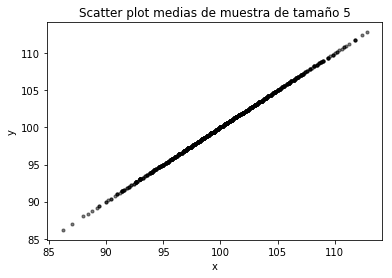

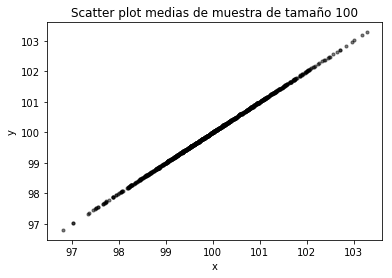

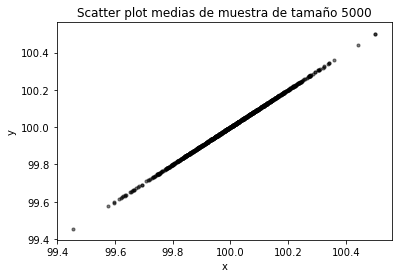

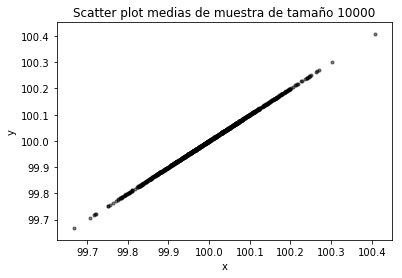

In [14]:
colors = (0,0,0)
area = np.pi*3 
plt.scatter(l1, l1, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot medias de muestra de tamaño 5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.scatter(l2, l2, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot medias de muestra de tamaño 100')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.scatter(l3, l3, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot medias de muestra de tamaño 5000')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.scatter(l4, l4, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot medias de muestra de tamaño 10000')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Se logra observar que mientras mayor es la densidad de la muestra, mayor sera la densidad de los datos sobre el $\lambda$ de la distribución y menor sera la disperción de las medias, dados los ejes de los gráficos.

Finalmente se generan boxplots para cada una de las muestras anteriores. Primero se grafican los cuatro boxplot para poder compararlos entre ellos y luego se grafica cada uno por separado para apreciar sus detalles de mejor manera.

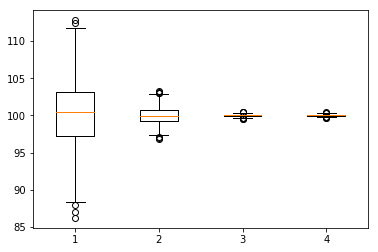

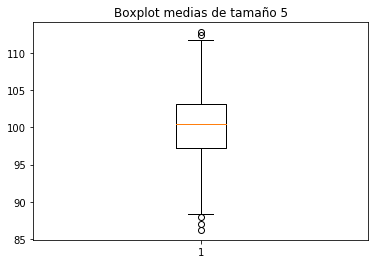

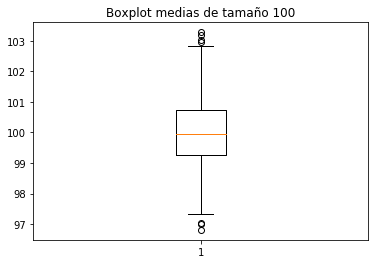

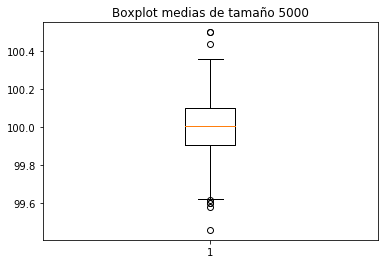

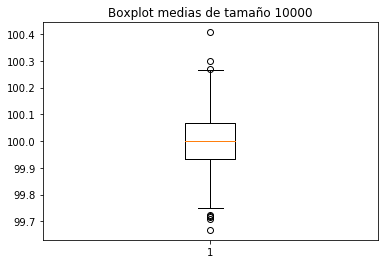

In [15]:
plt.boxplot([l1,l2,l3,l4])
plt.show()
plt.boxplot(l1)
plt.title("Boxplot medias de tamaño 5")
plt.show()
plt.boxplot(l2)
plt.title("Boxplot medias de tamaño 100")
plt.show()
plt.boxplot(l3)
plt.title("Boxplot medias de tamaño 5000")
plt.show()
plt.boxplot(l4)
plt.title("Boxplot medias de tamaño 10000")
plt.show()

A partir de los boxplots se logra observar nuevamente que mientras mayor es el tamaño de la muestra, más densidad de valores habrá cerca del $\lambda$ de la distribución y menor sera la dispersión. Esta dispersión se logra observar gracias a los bigotes de los boxplots, que para cada boxplot se van haciendo mas cortos. Además, observando el primer gráfico, se puede observar que para la muestra de tamaño 10000, la concentración de los datos sobre la media teórica es mucho mayor. Esto concuerda con lo observado en los Scatterplots, donde a medida que se aumenta el tamaño muestral los puntos tienden a estar más concentrados entorno a la media teórica.

Para cada caso se dieron outliers, los cuales son producto de la aletoriedad de los datos respecto a la distribución.

# Teorema de la Función Inversa

En esta sección se utilizará la distribución de Weibull para observar lo planteado por el Teorema de la Función Inversa, con el cual se puede generar variables aleatorias continuas a partir de la inversa de su función de distribución, donde los valores de la inversa están regidos por una distribución uniforme con parámetros 0 y 1.

Sea $X$ una variable aleatoria continua con distribución de Weibull, su función de densidad de probabilidad es la siguiente.

$$ f(x) = \frac{\alpha}{\beta^{\alpha}}\cdot x^{\alpha - 1} \cdot e^{\left(\frac{-x}{\beta}\right)^\alpha}$$

Luego, para encontrar su función de distribución, es necesario integrar la función de densidad hasta un valor $x$. Como la distribución de Weibull está definida desde cero a infinito, la integral será desde 0 a x.

$$ F(x) = P(X < x) = \int_{o}^{x} \frac{\alpha}{\beta^{\alpha}}\cdot t^{\alpha - 1} \cdot e^{\left(\frac{-t}{\beta}\right)^\alpha} dt = 1 - e^{-\left(\frac{x}{\beta}\right)^{\alpha}}$$

Se debe comprobar que $F(x)$ sea invertible, para esto se comprueba si es inyectiva, es decir, es invertible si $ F(x_1) = F(X_2)$ si y solo si $x_1 = x_2$.

$$  1 - e^{-\left(\frac{x_1}{\beta}\right)^{\alpha}} =  1 - e^{-\left(\frac{x_2}{\beta}\right)^{\alpha}}$$

$$ ln\left(e^{-\left(\frac{x_1}{\beta}\right)^{\alpha}}\right) = ln\left(e^{-\left(\frac{x_2}{\beta}\right)^{\alpha}}\right) $$

Dado el rango en que está definido $x$, $\alpha$ y $\beta$ se puede aplicar raíz.

$$ \frac{x_1}{\beta} = \frac{x_2}{\beta}$$
$$ x_1 = x_2 $$

Por lo tanto, F(x) es inyectiva y por ende, invertible.

Para obtener su inversa, se necesita de una variable $u \sim U(0, 1)$, la que se iguala a la función de distribución para despejar $x$. 

$$ 1 - e^{-\left(\frac{x}{\beta}\right)^{\alpha}} = u$$
$$ e^{-\left(\frac{x}{\beta}\right)^{\alpha}} = 1 - u$$
$$ \left(\frac{x}{\beta}\right)^\alpha = -ln(1 - u)$$
$$ \frac{x}{\beta} = \left(-ln(1 - u)\right)^{\frac{1}{\alpha}}$$
$$ x = \beta\left(-ln(1 - u)\right)^{\frac{1}{\alpha}}$$

De esta manera se obtiene la función inversa, en esta caso se utiliza $\alpha = 10$ y $\beta = 3$. 

$$ F^{-1}(u) = 3\left(-ln(1 - u)\right)^{\frac{1}{10}}$$



# Teorema del Límite Central

Sean
$$ X_1 \sim Exp(0.1) $$
$$ X_2 \sim Exp(0.5) $$
$$ X_3 \sim Exp(0.2) $$
$$ X_4 \sim Poi(1) $$
$$ X_5 \sim Poi(20) $$
$$ X_6 \sim Poi(50) $$
$$ X_7 \sim N(10, 5) $$
$$ X_8 \sim N(20, 30) $$
$$ X_9 \sim N(40, 50) $$

Nueve variables aleatorias independientes. Si se considera una nueva variable aleatoria $X_s$ igual a la suma de todas las variables aleatorias anteriores.

$$ X_s = \sum_{i = 1}^{9} X_{i} $$

El valor esperado de $X_s$ está dado por la siguiente expresión.

$$ E[X_s] = E\left[\sum_{i = 1}^{9}X_i\right] = \sum_{i = 1}^{9}E[X_i]$$

Además, como las variables son independientes, su varianza está dada por la siguiente expresión.

$$ V[X_s] = V\left[\sum_{i = 1}^{9}X_i\right] = \sum_{i = 1}^{9}V[X_i]$$

Con dichas expresiones se puede calcular la media y varianza teórica de $X_s$

$$ E[X_s] = 0.1 + 0.5 + 0.2 + 1 + 20 + 50 + 10 + 20 + 40 = 141.8$$
$$ V[X_s] = 0.1^2 + 0.5^2 + 0.2^2 + 1 + 20 + 50 + 5 + 30 + 50 = 156,3 $$ 

Para comprobar si se cumple lo dicho por el teorema del límite central se generan distintas muestras de tamaño $100000$, cada una correspondiente a las variables aleatorias antes mencionadas. Luego, como la suma se debería distribuir de manera normal  $\sim  N(E[X_s],V[X_s])$, se suman las medias y las varianzas de las muestras generadas.

In [16]:
np.random.seed(10)
n = 100000
x1 = np.random.exponential(0.1, n)
x2 = np.random.exponential(0.5, n)
x3 = np.random.exponential(0.2, n)
x4 = np.random.poisson(1, n)
x5 = np.random.poisson(20, n)
x6 = np.random.poisson(50, n)
x7 = np.random.normal(10,5**(1/2), n)
x8 = np.random.normal(20, 30**(1/2), n)
x9 = np.random.normal(40, 50**(1/2), n)

media = np.mean(x1) + np.mean(x2) + np.mean(x3) + np.mean(x4) + np.mean(x5) + np.mean(x6) + np.mean(x7) + np.mean(x8) + np.mean(x9)
varianza = np.var(x1) + np.var(x2) + np.var(x3) + np.var(x4) + np.var(x5) + np.var(x6) + np.var(x7) + np.var(x8) + np.var(x9)
print("La suma de medias es: " + str(media))
print("La suma de varianzas es: "+ str(varianza))

La suma de medias es: 141.774576676
La suma de varianzas es: 156.345655073


Se obtiene una media y varianza de $141.8$ y $156.3$ aproximadamente, lo cual concuerda con los valores teóricos obtenidos anteriormente.

De esta manera $X_s \sim N(141.8, 156.3)$, por lo que se puede expresar como estándar de la siguiente manera.

$$ N(x; 141.8, 156.3) = N\left(\frac{x - 141.8}{156.3}, 1, 0\right) = \Phi\left(\frac{x - 141.8}{156.3}\right)  $$

Lo cual se logra dividiendo la diferencia entre la variable aleatoria con su media.

# Estudio de Tiempos de Vida

Un gráfico _Cuantil-Cuantil_ (_Q-Q plot_) es una técnica para comparar gráficamente dos distribuciones de probabilidad. En este, se considera un intervalo desde el cual se seleccionan los cuantiles para luego graficar los puntos $(x_i,y_i)$, donde cada $x_i$ corresponde al cuantil $i$ de la primera distribución y $y_i$ es el cuantil $i$ de la segunda distribución.

En el caso de que las distribuciones sean similares, los pares coordenados tenderán a ubicarse en la recta $x = y$. Si producen una recta, pero no la $x = y$, significa que las distribuciones están linealmente relacionadas.

Este tipo de gráficos tiene distintas utilizades, entre las que se encuentra la comparación de muestras frente a una distribución teórica, ver si el sesgo, parámetros de escala y las medidas de tendencia central, son similares entre dos distribuciones.

En este caso, se utilizará para comparar una muestra de tiempos de vida de un determinado electrodoméstico contra seis distribuciones de Weibull. Se procede a graficar la muestra proporcionada en el archivo _"muestra1.csv"_ en seis Q-Q plot con las distintas distribuciones. Además, se grafica la recta $y = x$ con $x, y \in [6,12]$(el dominio fue determinado previa inspección de los cuantiles de la muestra) para ver que tanto se ajustan los pares coordenados a dicha recta.

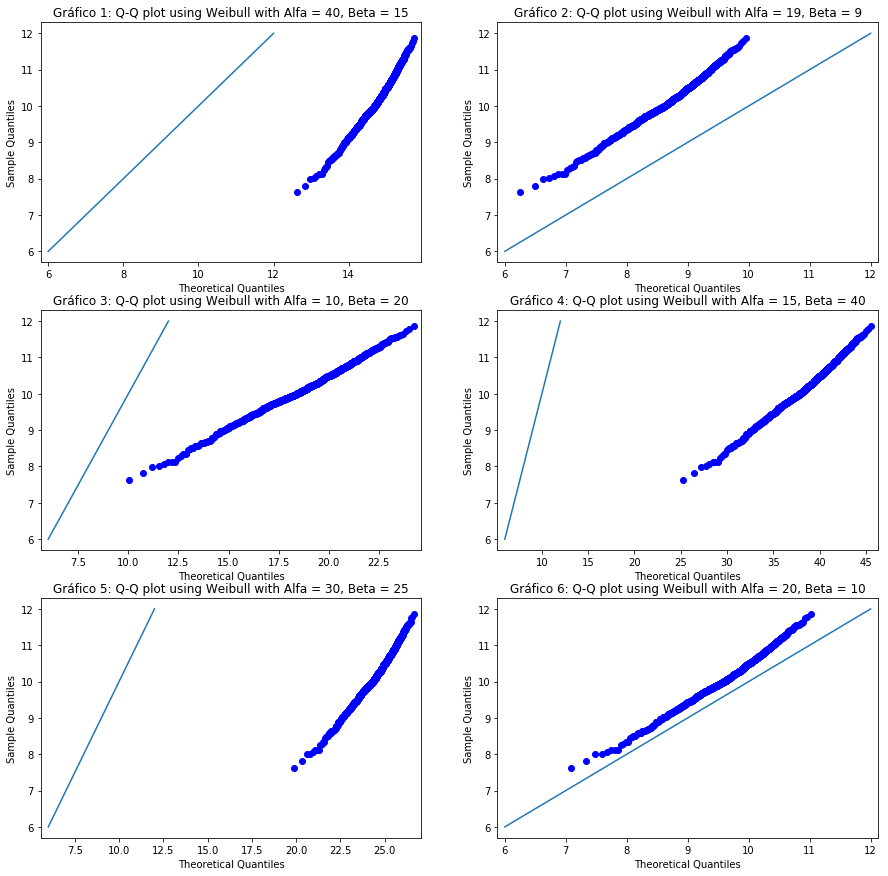

In [17]:
muestra1 = pd.read_csv('muestra1.csv')

x = [6,7,8,9,11,12]
y = [6,7,8,9,11,12]


fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(15,15))
sm.qqplot(muestra1['valor'], stats.weibull_min,distargs=(40,),scale=15,ax=axes[0][0])
axes[0][0].plot(x,y)
axes[0][0].set_title('Gráfico 1: Q-Q plot using Weibull with Alfa = 40, Beta = 15')

sm.qqplot(muestra1['valor'], stats.weibull_min,distargs=(19,),scale=9,ax=axes[0][1])
axes[0][1].plot(x,y)
axes[0][1].set_title('Gráfico 2: Q-Q plot using Weibull with Alfa = 19, Beta = 9')

sm.qqplot(muestra1['valor'], stats.weibull_min, distargs=(10,),scale=20,ax=axes[1][0])
axes[1][0].plot(x,y)
axes[1][0].set_title('Gráfico 3: Q-Q plot using Weibull with Alfa = 10, Beta = 20')

sm.qqplot(muestra1['valor'], stats.weibull_min, distargs=(15,),scale=40,ax=axes[1][1])
axes[1][1].plot(x,y)
axes[1][1].set_title('Gráfico 4: Q-Q plot using Weibull with Alfa = 15, Beta = 40')

sm.qqplot(muestra1['valor'], stats.weibull_min, distargs=(30,), scale=25,ax=axes[2][0])
axes[2][0].plot(x,y)
axes[2][0].set_title('Gráfico 5: Q-Q plot using Weibull with Alfa = 30, Beta = 25')

sm.qqplot(muestra1['valor'], stats.weibull_min, distargs=(20,),scale=10,ax=axes[2][1])
axes[2][1].plot(x,y)
axes[2][1].set_title('Gráfico 6: Q-Q plot using Weibull with Alfa = 20, Beta = 10')
plt.show()

Como se puede observar, la muestra tiene una relación lineal con todas las distribuciones pues se observa que los puntos graficados forman una especie de recta. Bajo esta misma inspección, se ve que la distribución con parámetros $\alpha = 20$, $\beta = 10$ (grafico 6) es la que mejor se ajusta a la muestra de datos, debido a que es donde más se acercan los pares coordenados a la recta $y = x$.

# Verosimilitud

Para estimar los parámetros que posee una determinada muestra(considerando una determinada distribución) existen variados métodos, en este caso se utilizará el método de la _Máxima Versimilitud_, el cual consiste en encontrar los valores máximos de la función de Verosimilitud.

$$ L(x|\theta) =  \prod_{i = 1}^{N} f(x_i|\theta)$$

Debido a la forma de esta, y aprovechando las propiedades de la función logaritmo, se suele utilizar la función _Log-Verosimilitud_, con la cual se obtiene el mismo resultado.

$$ l(x|\theta) = \sum_{i = 1}^{N} ln(f(x_i|\theta))$$

Para encontrar el máximo de la función _Log-Verosimilitud_ se utilizará el método de _Newton-Raphson_, un método iterativo el cual sirve para encontrar las raíces de una función real derivable. 

$$ x_{i + 1} = x_{i} + \frac{f(x_i)}{f'(x_i)}$$

Dado que encontrar el máximo de una función es equivalente a encontrar las raíces de su primera derivada, el método de Newton-Raphson quedaría de la siguiente manera.

$$ \theta_{i + 1} = \theta_{i} + \frac{l'(x|\theta_i)}{l''(x|\theta_i)}$$

Considerando una distribución Gamma con parámetro $\alpha$ desconocido y $\beta = 1$. 

$$ f(x) = \frac{1}{\Gamma(\alpha)} \cdot x^{\alpha - 1} \cdot e^{-x} $$

Al aplicar la función Log-Verosimilitud y derivar, se obtienen las primera dos derivadas necesarias para el método

$$l'(x|\alpha) = -N \cdot \frac{\Gamma'(\alpha)}{\Gamma(\alpha)} + \sum_{i = 1}^{N}ln(x_i)$$

$$l''(x|\alpha) = -N \cdot \left( \frac{\Gamma'(\alpha)}{\Gamma(\alpha)} \right)' $$

Con $x_i$ el elemento $i$ de la muestra a utilizar, $N$ la cantidad de elementos en la muestra y $\alpha$ el parámetro a utilizar.En este caso la muestra se encuentra en el archivo _"gamma.csv"_. 

Se programa ambas derivadas y se implementa el método de Newton-Raphson, considerando $\alpha_0 = 0.2$ y un umbral de detención de $u = 0.0000001$, es decir, el método se detendrá cuando la diferencia entre $\alpha_{i + 1}$ y $\alpha_{i}$ sea menor a dicho umbral.

In [18]:
def primeraDerivada(alpha, n, sumatoria):
    return (-n * special.digamma(alpha)) + sumatoria 
    
def segundaDerivada(alpha, n):
    return (-n * special.polygamma(1, alpha))

alpha = 0.2
newalpha = 0

umbral = 0.0000001

muestra = pd.read_csv('gamma.csv')
n = len(muestra['x'])
sumatoria = 0

for i in muestra['x']:
    sumatoria += math.log(i)

while(True):
    newalpha = alpha - (primeraDerivada(alpha, n, sumatoria)/segundaDerivada(alpha, n))
    if(abs(newalpha - alpha)< umbral):
        alpha = newalpha
        break
    alpha = newalpha
print(alpha)

2.60349215342


Aplicando el método, se obtiene que el estimador máximo verosimil de $\alpha$ es de 2.60349215342.